In [28]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,12)})
from tqdm import tqdm
import matplotlib.pyplot as plt

In [65]:
# Load full Data
df_full = pd.read_csv('data/processed/SimpleNNData.csv', index_col=0)
weather_var = list(df_full.columns[-22:-1])
df_full

,time_to_reservation,park_fuel,degree,weekend,hour_index,eng_118I,eng_COOPER,eng_I3,eng_X1,lz_102111,...,Avg_mean_relative_hum,Avg_mean_cloud_cover,Avg_Index_mean_temp,Avg_Index_mean_wind_speed,Avg_Index_acc_precip,Avg_Index_bright_sunshine,Avg_Index_mean_pressure,Avg_Index_mean_relative_hum,Avg_Index_mean_cloud_cover,dist_to_station
0,7.722778,43,12.529378,0,6.805269,0,0,1,0,0,...,73.877778,79.444444,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,386.856080
1,6.774445,86,14.027280,0,6.805269,0,0,1,0,0,...,74.612500,85.125000,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,1096.295483
2,6.522222,5,17.751882,0,6.805269,1,0,0,0,0,...,74.612500,85.125000,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,812.660741
3,5.100833,30,1.806991,0,6.805269,0,0,1,0,0,...,74.866667,81.166667,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,897.592806
4,6.211945,32,13.214864,0,6.805269,0,1,0,0,0,...,75.128571,83.571429,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,599.103807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326733,6.307500,94,20.556195,0,6.457874,0,0,1,0,0,...,96.385714,41.857143,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,275.431500
326734,7.528611,57,14.221806,0,6.457874,1,0,0,0,0,...,96.155556,38.222222,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,546.398658
326735,7.865556,48,16.451925,0,6.457874,1,0,0,0,0,...,96.155556,38.222222,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,615.556913
326736,5.028056,23,15.140361,0,6.457874,0,0,1,0,0,...,96.183333,33.833333,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,495.570805


## Hour (traffic index)

In [163]:
tdf.park_time

0           8
1          15
2          16
3          23
4           2
           ..
1700858    16
1700859    17
1700860    18
1700861    19
1700862    20
Name: park_time, Length: 1700863, dtype: int64

In [164]:
tdf = pd.read_csv('data/processed/Vacancy_new.csv', parse_dates=[2,3], index_col=0)
tdf['weekend'] = tdf.park_time.dt.weekday//5
tdf['park_time'] = tdf.park_time.round('h').dt.hour

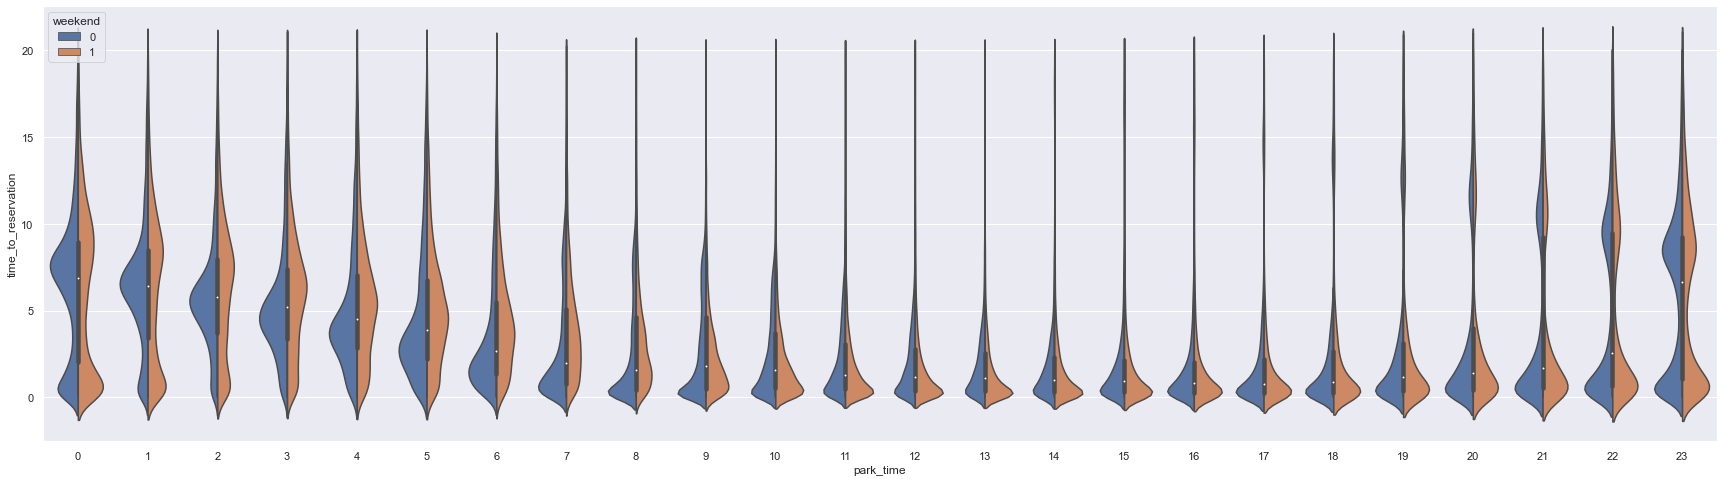

In [165]:
f = plt.figure(figsize=(30,8))
sns.violinplot(x = 'park_time', y = 'time_to_reservation',  hue = 'weekend',  split=True, data = tdf[tdf.time_to_reservation<=20])
ax.axes.set_title("Vacancy Time as a Function of Parking Time",fontsize=24)
ax.set_xlabel('Time of Park',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show()

## Fuel

In [50]:
# Lower leads to faster pick-up time. Maybe the effect of rewarding "fueling" works
df_full[['time_to_reservation', 'park_fuel']].corr()

,time_to_reservation,park_fuel
time_to_reservation,1.00000,0.01372
park_fuel,0.01372,1.00000


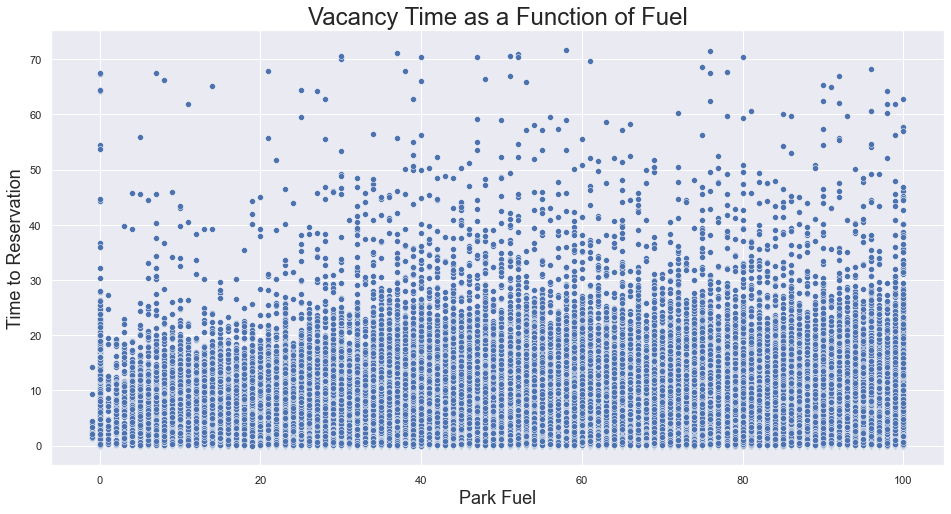

In [64]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'park_fuel', y ='time_to_reservation', data = df_full)
ax.axes.set_title("Vacancy Time as a Function of Fuel",fontsize=24)
ax.set_xlabel('Park Fuel',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show()

## Engine + Weekend

In [38]:
Engine_Weekend_df = pd.concat([df_full.filter(regex = 'eng').idxmax(axis = 1),df_full[['time_to_reservation','weekend']]], axis = 1).rename(columns = {0:'Engine'})

[(0.0, 12.0)]

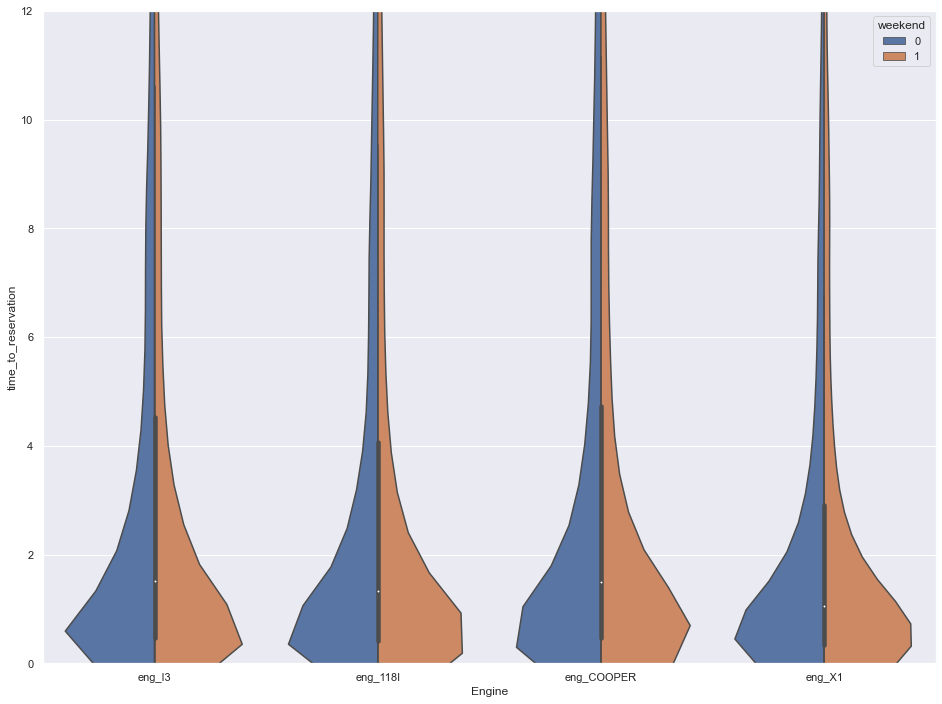

In [39]:
ax = sns.violinplot(x = 'Engine', y = 'time_to_reservation', hue = 'weekend',  split=True,data = Engine_Weekend_df)
ax.set(ylim=(0,12), )

In [45]:
Engine_Weekend_df.pivot_table(index = 'Engine', columns = 'weekend', values = 'time_to_reservation')

weekend,0,1
Engine,,
eng_118I,3.337945,3.054925
eng_COOPER,3.700722,3.357301
eng_I3,3.509500,3.335368
eng_X1,2.562786,2.383819


## Degree

In [66]:
# More cars close 
df_full[['time_to_reservation', 'degree']].corr()

,time_to_reservation,degree
time_to_reservation,1.000000,0.111294
degree,0.111294,1.000000


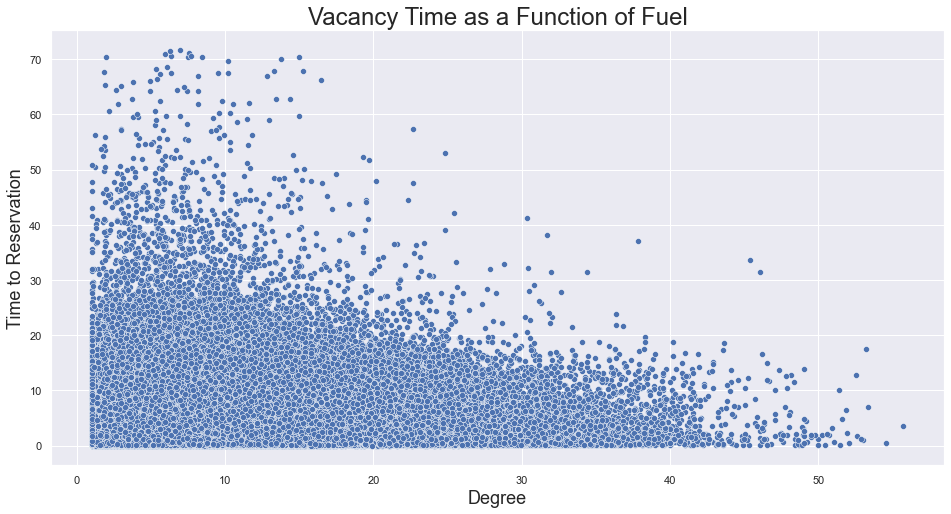

In [68]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'degree', y ='time_to_reservation', data = df_full)
ax.axes.set_title("Vacancy Time as a Function of Fuel",fontsize=24)
ax.set_xlabel('Degree',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show() # Very high degree must be in popular area why no extreme long time

In [70]:
df_full.time_to_reservation

0         7.722778
1         6.774445
2         6.522222
3         5.100833
4         6.211945
            ...   
326733    6.307500
326734    7.528611
326735    7.865556
326736    5.028056
326737    0.312222
Name: time_to_reservation, Length: 326738, dtype: float64

## Zone

In [86]:
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','degree']]], axis = 1).rename(columns = {0:'Zone'})

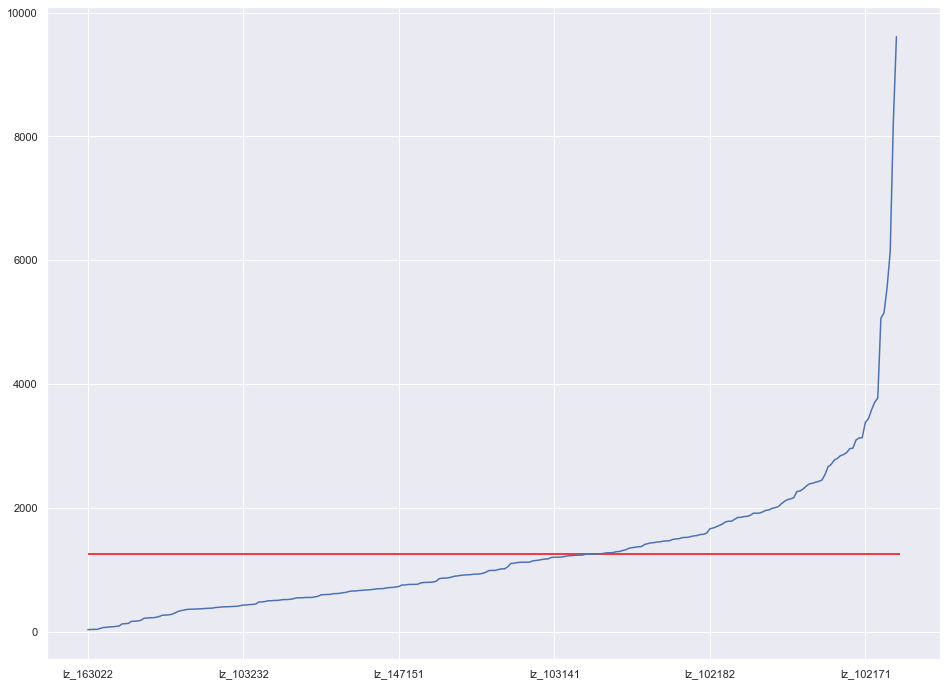

In [140]:
# Count per Zone
Zone_df.Zone.value_counts().sort_values(ascending = True).plot()
plt.hlines(y = Zone_df.Zone.value_counts().sort_values(ascending = True).mean(),xmin = 0, xmax=Zone_df.Zone.nunique(), colors = 'red')

In [130]:
Zone_time = Zone_df.groupby('Zone').mean().sort_values(by = 'time_to_reservation')
Zone_time['Count'] = Zone_time.index.map(dict(Zone_df.Zone.value_counts()))
Zone_time

,time_to_reservation,degree,Count
Zone,,,
lz_102184,0.921950,12.700080,1292
lz_102121,1.159903,13.710118,2351
lz_102151,1.164936,11.499416,1227
lz_102161,1.167401,13.019858,910
lz_102122,1.263664,14.142530,1047
...,...,...,...
lz_155017,9.396325,2.449789,340
lz_102322,10.517806,8.182583,90
lz_159053,12.279907,2.765415,36


In [104]:
# Zone + degree
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Deg_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','degree']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

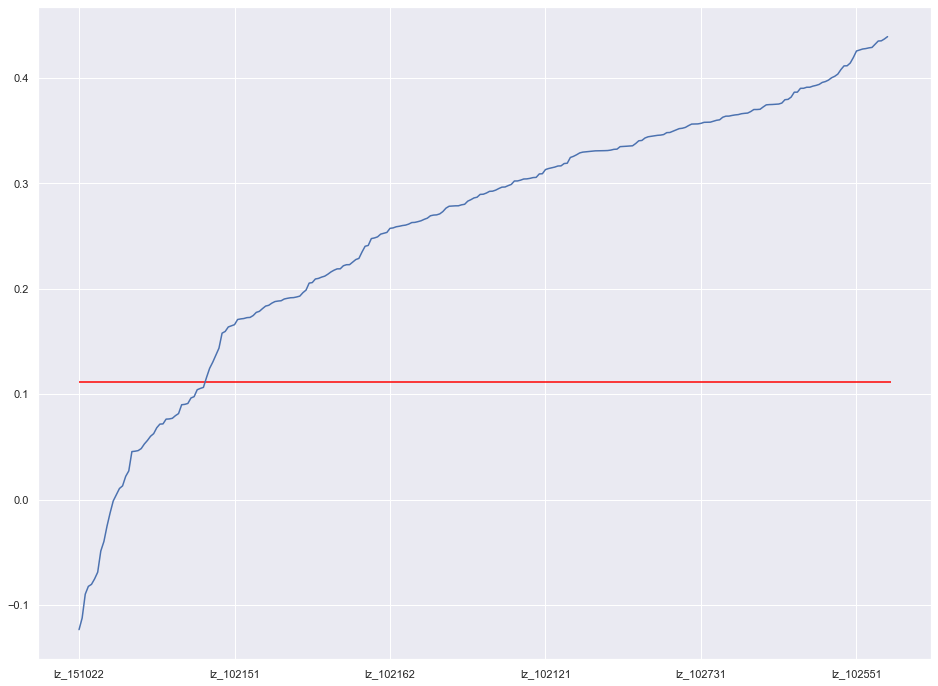

In [114]:
Deg_corr_Zone.sort_values().plot()
plt.hlines(y=df_full[['time_to_reservation', 'degree']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red')

## Stations

In [142]:
df_full[['time_to_reservation', 'dist_to_station']].corr()

,time_to_reservation,dist_to_station
time_to_reservation,1.00000,0.11689
dist_to_station,0.11689,1.00000
